In [1]:
import numpy as np
import math
from matplotlib import pyplot as plt

In [2]:
Lx=10.0
Ly=5.0
dx=0.05
dy=0.05
D=1.0
dt=0.001
nx=int(Lx/dx)
ny=int(Ly/dy)
nt=500

initial conditions

In [3]:
pin=np.zeros((nx,ny))


Boundary conditions

In [4]:
def Jacobi_iter(p):
    p_new=np.copy(p)
    for n in range(nt):
        p[0,:]=p[-2,:]
        p[-1,:]=p[1,:]
        p[:,0]=p[:,-2]
        p[:,-1]=pin[:,1]
        for i in range(1,nx-1):
            for j in range(1,ny-1):
                p_new[i,j]=0.25 * (p[i+1, j] + p[i-1, j] + p[i, j+1] + p[i, j-1])

        p[:] = p_new[:]
    return p

In [5]:
result=Jacobi_iter(pin)
print(result)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [6]:
pin[:, 0] = 20
pin[:, -1] = 10

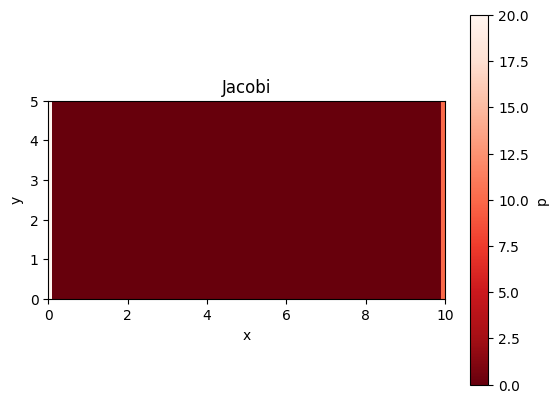

In [10]:
result=Jacobi_iter(pin)
plt.imshow(result, extent=[0, Lx, 0, Ly], origin='lower', cmap='Reds_r', interpolation='nearest')
plt.colorbar(label='p')
plt.title('Jacobi')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [11]:
def FTCS(p):
    p_new=np.copy(p)
    for n in range(nt):
        p[0,:]=p[-2,:]
        p[-1,:]=p[1,:]
        p[:,0]=p[:,-2]
        p[:,-1]=pin[:,1]
        for i in range(1,nx-1):
            for j in range(1,ny-1):
                p_new[i,j]=p[i,j]+D*dt/dx**2*(p[i+1,j]-2.0*p[i,j]+p[i-1,j])+D*dt/dy**2*(p[i,j+1]-2.0*p[i,j]+p[i,j-1])                

        p[:] = p_new[:]
    return p

In [12]:
pin[:, 0] = 20
pin[:, -1] = 10

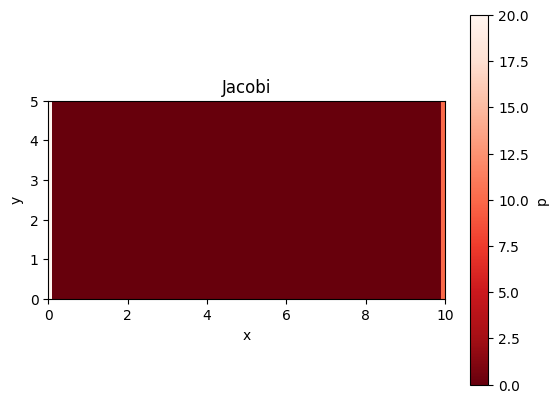

In [13]:
result=FTCS(pin)
plt.imshow(result, extent=[0, Lx, 0, Ly], origin='lower', cmap='Reds_r', interpolation='nearest')
plt.colorbar(label='p')
plt.title('Jacobi')
plt.xlabel('x')
plt.ylabel('y')
plt.show()